# Step 1: Load Dataset

In [1]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#SQuAD v2.0 dataset (only using a portion)
squad = load_dataset("squad_v2", split="train[:5000]")
# Split into train and test
squad = squad.train_test_split(test_size=0.2)

# Preview an example from the dataset
print(squad["train"][0])

README.md:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

{'id': '57342802d058e614000b6a43', 'title': 'Montana', 'context': 'In the early 1900s, James J. Hill of the Great Northern began promoting settlement in the Montana prairie to fill his trains with settlers and goods. Other railroads followed suit. In 1902, the Reclamation Act was passed, allowing irrigation projects to be built in Montana\'s eastern river valleys. In 1909, Congress passed the Enlarged Homestead Act that expanded the amount of free land from 160 to 320 acres (0.6 to 1.3 km2) per family and in 1912 reduced the time to "prove up" on a claim to three years. In 1916, the Stock-Raising Homestead Act allowed homesteads of 640 acres in areas unsuitable for irrigation.  This combination of advertising and changes in the Homestead Act drew tens of thousands of homesteaders, lured by free land, with World War I bringing particularly high wheat prices. In addition, Montana was going through a temporary period of higher-than-average precipitation. Homesteaders arriving in this peri

# Step 2: EDA (Exploratory Data Analysis)

In [2]:
# Show dataset split info
print("Train dataset size:", len(squad["train"]))
print("Test dataset size:", len(squad["test"]))

# Show columns in the dataset
print(squad["train"].column_names)


Train dataset size: 4000
Test dataset size: 1000
['id', 'title', 'context', 'question', 'answers']


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


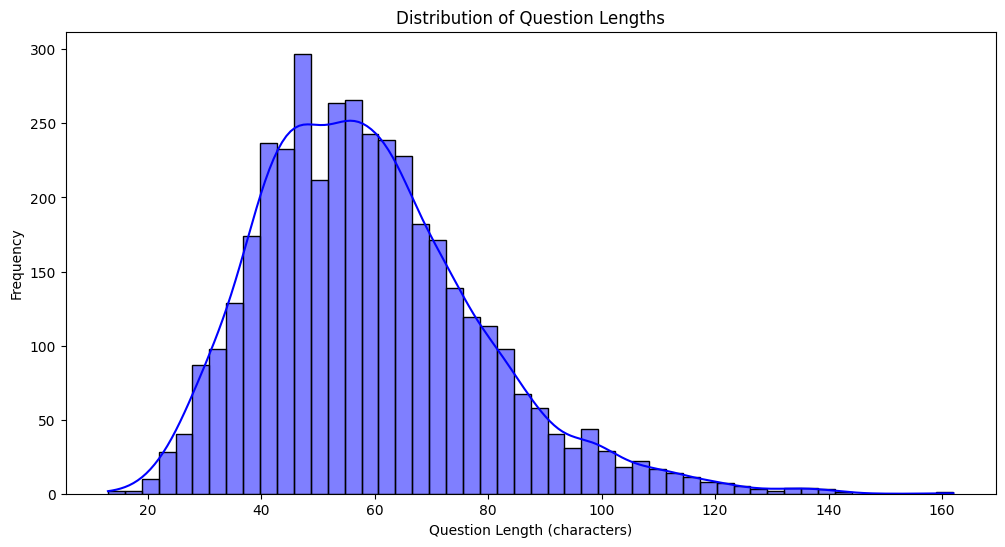

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


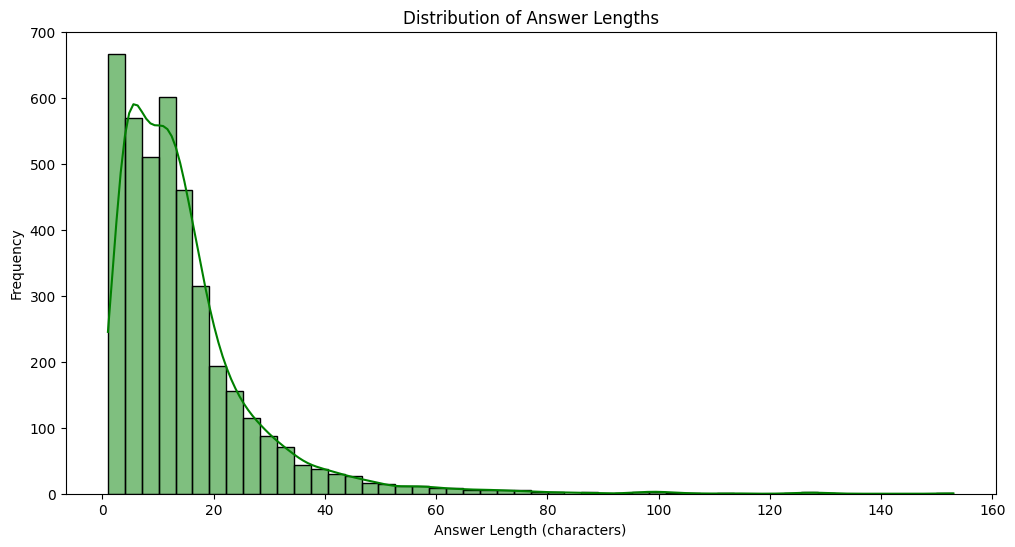

In [3]:
# Compute the length of questions and answers using map
def compute_question_length(example):
    example['question_len'] = len(example['question'])
    return example

def compute_answer_length(example):
    example['answer_len'] = len(example['answers']['text'][0])  # Taking the first answer text
    return example

# Apply the functions to the dataset
squad['train'] = squad['train'].map(compute_question_length)
squad['train'] = squad['train'].map(compute_answer_length)

# Plot the distribution of question lengths
plt.figure(figsize=(12, 6))
sns.histplot(squad['train']['question_len'], kde=True, color='blue', bins=50)
plt.title('Distribution of Question Lengths')
plt.xlabel('Question Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of answer lengths
plt.figure(figsize=(12, 6))
sns.histplot(squad['train']['answer_len'], kde=True, color='green', bins=50)
plt.title('Distribution of Answer Lengths')
plt.xlabel('Answer Length (characters)')
plt.ylabel('Frequency')
plt.show()

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


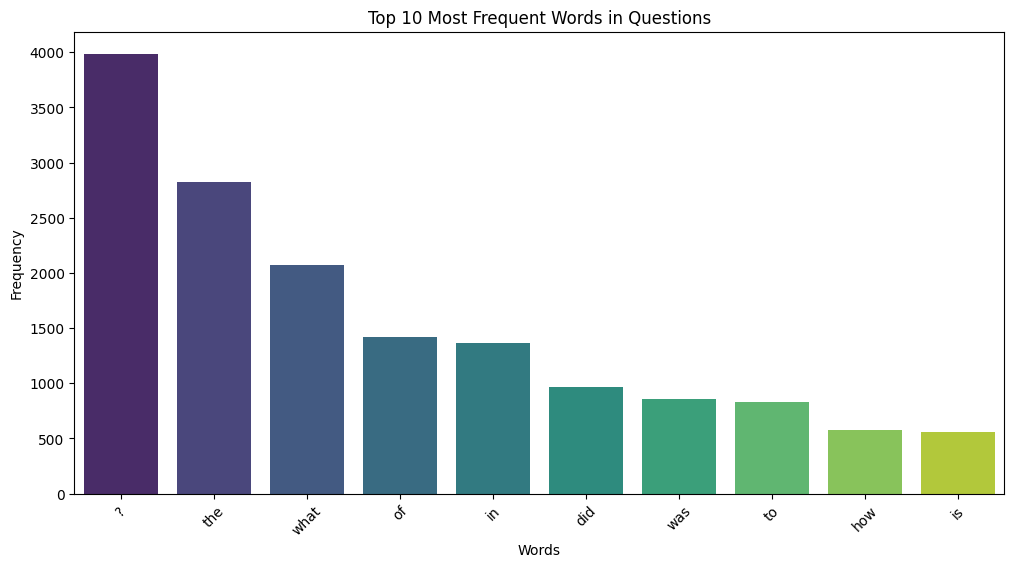

In [4]:
# Top 10 Most Frequent Words in Questions
from collections import Counter
import nltk
nltk.download('punkt')

# Tokenize questions and find the most common words
all_questions = " ".join(squad['train']['question'])
tokens = nltk.word_tokenize(all_questions.lower())  # Tokenizing and lowercasing the words
word_counts = Counter(tokens)

# Get top 10 most common words in the questions
top_10_words = word_counts.most_common(10)
words, counts = zip(*top_10_words)

# Plot top 10 most frequent words
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title('Top 10 Most Frequent Words in Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


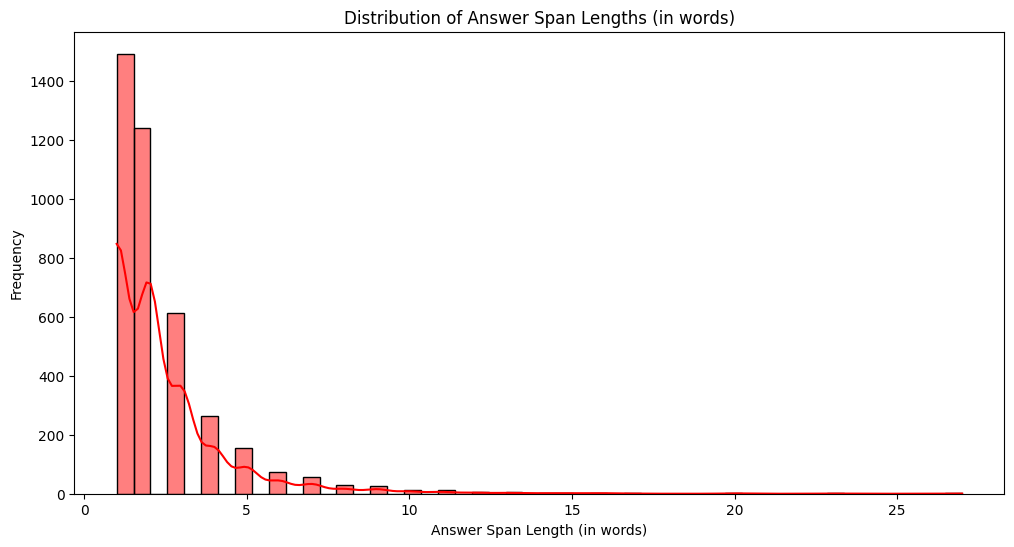

In [5]:
# Function to compute the length of the answer span in words
def compute_answer_span_length(example):
    example['answer_span_len'] = len(example['answers']['text'][0].split())  # Split answer into words and count
    return example

# Apply the function to the dataset
squad['train'] = squad['train'].map(compute_answer_span_length)

# Plot the distribution of answer span lengths (in words)
plt.figure(figsize=(12, 6))
sns.histplot(squad['train']['answer_span_len'], kde=True, color='red', bins=50)
plt.title('Distribution of Answer Span Lengths (in words)')
plt.xlabel('Answer Span Length (in words)')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Question-Answer Pair Example Visualization
# Randomly sample 5 examples from the train dataset
sampled_data = squad['train'].shuffle(seed=42).select([0, 1, 2, 3, 4])

# Display questions and answers
for idx, example in enumerate(sampled_data):
    print(f"Example {idx + 1}:")
    print(f"Question: {example['question']}")
    print(f"Answer: {example['answers']['text'][0]}")
    print("-" * 50)


Example 1:
Question: What percent of the state is Native American Indian?
Answer: 6.3 percent
--------------------------------------------------
Example 2:
Question: How has this foundation changed in recent years?
Answer: expanded to work with other charities
--------------------------------------------------
Example 3:
Question: Who showed a great amount of respect to Deshin Shekpa?
Answer: the Yongle Emperor
--------------------------------------------------
Example 4:
Question: What two serious moral issues are dealt with in the novel?
Answer: rape and racial inequality
--------------------------------------------------
Example 5:
Question: Where is Yingxiu located?
Answer: in Wenchuan
--------------------------------------------------


# Step 3: Data Preprocessing, Cleaning, Tokenization and so

In [7]:
from transformers import AutoTokenizer

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

# Preprocess function
def preprocess_function(examples):
    questions = [q.strip() for q in examples["question"]]
    inputs = tokenizer(
        questions,
        examples["context"],
        max_length=384,
        truncation="only_second",
        return_offsets_mapping=True,
        padding="max_length",
    )

    offset_mapping = inputs.pop("offset_mapping")
    answers = examples["answers"]
    start_positions = []
    end_positions = []

    for i, offset in enumerate(offset_mapping):
        answer = answers[i]
        start_char = answer["answer_start"][0]
        end_char = answer["answer_start"][0] + len(answer["text"][0])
        sequence_ids = inputs.sequence_ids(i)

        # Find the start and end of the context
        idx = 0
        while sequence_ids[idx] != 1:
            idx += 1
        context_start = idx
        while sequence_ids[idx] == 1:
            idx += 1
        context_end = idx - 1

        # If the answer is not fully inside the context, label it (0, 0)
        if offset[context_start][0] > end_char or offset[context_end][1] < start_char:
            start_positions.append(0)
            end_positions.append(0)
        else:
            # Otherwise it's the start and end token positions
            idx = context_start
            while idx <= context_end and offset[idx][0] <= start_char:
                idx += 1
            start_positions.append(idx - 1)

            idx = context_end
            while idx >= context_start and offset[idx][1] >= end_char:
                idx -= 1
            end_positions.append(idx + 1)

    inputs["start_positions"] = start_positions
    inputs["end_positions"] = end_positions
    return inputs

# Tokenize the dataset
tokenized_squad = squad.map(preprocess_function, batched=True, remove_columns=["question", "context", "answers", "id", "title"])

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/4000 [00:00<?, ? examples/s]

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

# Step 4: Fine Tuning Bert With Evaluation (F1, EM(Exact Match, Train, Loss Plots)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForQuestionAnswering were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['qa_outputs.bias', 'qa_outputs.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1545: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,F1,Accuracy,Exact Match
1,2.944800,1.750521,0.469992,0.543000,0.424000
2,1.369000,1.485894,0.501291,0.587000,0.464000
3,0.875000,1.536031,0.516908,0.592000,0.480000
4,0.563300,1.845934,0.515413,0.589000,0.479000
5,0.396500,2.023543,0.510697,0.597000,0.480000
6,0.275200,2.216377,0.509499,0.590000,0.470000
7,0.204500,2.346648,0.500000,0.582000,0.472000
8,0.149700,2.529644,0.495338,0.588000,0.469000
9,0.119400,2.660124,0.504812,0.590000,0.480000
10,0.101700,2.703023,0.515282,0.590000,0.479000


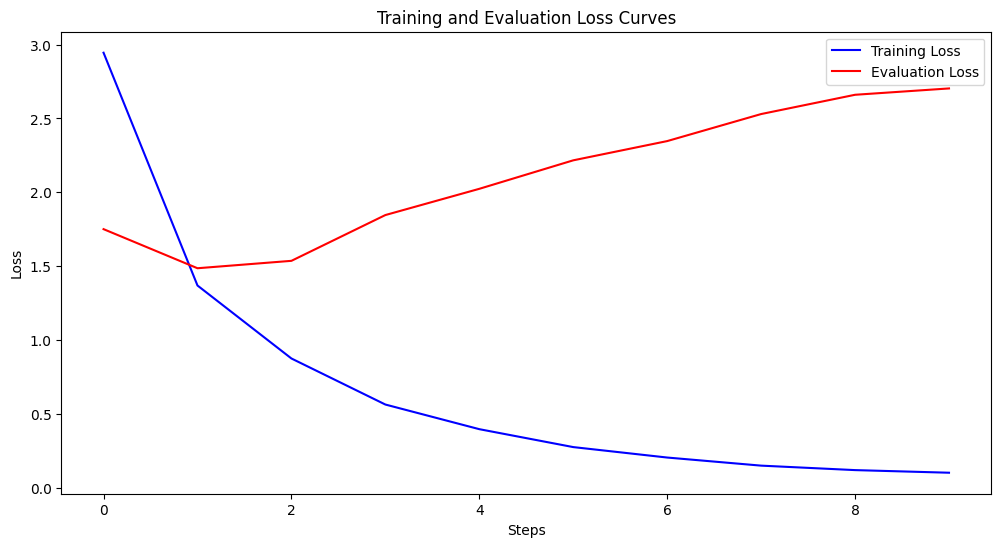

In [8]:
import torch
from transformers import AutoModelForQuestionAnswering, Trainer, TrainingArguments
from sklearn.metrics import f1_score, accuracy_score
from datasets import load_dataset
import matplotlib.pyplot as plt


# Load pre-trained DistilBERT model for Question Answering
model = AutoModelForQuestionAnswering.from_pretrained("distilbert-base-uncased")

# Training Arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",  # Evaluate at the end of each epoch
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,  # Set to 10 epochs
    weight_decay=0.01,
    logging_dir="./logs",  # Log directory for TensorBoard or logging output
    logging_steps=500,  # Log every 500 steps
    save_strategy="epoch",  # Save checkpoint every epoch to match evaluation strategy
    load_best_model_at_end=True,  # Load the best model at the end of training
    report_to="tensorboard"  # Enable TensorBoard logging
)


# Define a function for computing metrics
def compute_metrics(p):
    predictions, labels = p
    start_preds, end_preds = predictions
    start_labels, end_labels = labels

    # Convert NumPy arrays to PyTorch tensors if needed
    start_preds = torch.tensor(start_preds) if not isinstance(start_preds, torch.Tensor) else start_preds
    end_preds = torch.tensor(end_preds) if not isinstance(end_preds, torch.Tensor) else end_preds
    start_labels = torch.tensor(start_labels) if not isinstance(start_labels, torch.Tensor) else start_labels
    end_labels = torch.tensor(end_labels) if not isinstance(end_labels, torch.Tensor) else end_labels

    # Convert to 1D arrays for F1 score
    start_preds = torch.argmax(start_preds, dim=1)
    end_preds = torch.argmax(end_preds, dim=1)
    start_labels = start_labels.view(-1)
    end_labels = end_labels.view(-1)

    # Calculate F1 and accuracy scores
    start_f1 = f1_score(start_labels.cpu(), start_preds.cpu(), average='macro')
    end_f1 = f1_score(end_labels.cpu(), end_preds.cpu(), average='macro')
    f1 = (start_f1 + end_f1) / 2  # Combine start and end F1 scores
    accuracy = accuracy_score(start_labels.cpu(), start_preds.cpu())  # Simple accuracy for start positions

    # Exact Match (EM) score
    exact_match = (start_preds == start_labels) & (end_preds == end_labels)
    exact_match = exact_match.float().mean()

    return {"f1": f1, "accuracy": accuracy, "exact_match": exact_match.item()}


# Trainer initialization
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_squad["train"],
    eval_dataset=tokenized_squad["test"],
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Plotting Training and Evaluation Loss Curves
# After training, we can access the logs
logs = trainer.state.log_history

# Extracting the loss values from logs
train_loss = [log["loss"] for log in logs if "loss" in log]
eval_loss = [log["eval_loss"] for log in logs if "eval_loss" in log]

# Plotting the training and evaluation loss curves
plt.figure(figsize=(12, 6))

# Plot the training loss
plt.plot(train_loss, label='Training Loss', color='blue')

# Plot the evaluation loss
plt.plot(eval_loss, label='Evaluation Loss', color='red')

plt.title("Training and Evaluation Loss Curves")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Step 5: Evaluation

In [9]:
# Evaluate the model
eval_results = trainer.evaluate()

print(f"Evaluation results: {eval_results}")


Evaluation results: {'eval_loss': 1.4858943223953247, 'eval_f1': 0.5012912412735651, 'eval_accuracy': 0.587, 'eval_exact_match': 0.46399998664855957, 'eval_runtime': 7.3204, 'eval_samples_per_second': 136.605, 'eval_steps_per_second': 17.076, 'epoch': 10.0}


# Step 6: Save Model And Tokenizer

In [10]:
# Save the trained model and tokenizer
model.save_pretrained("./saved_qa_model_bert")
tokenizer.save_pretrained("./saved_qa_model_bert")

('./saved_qa_model_bert/tokenizer_config.json',
 './saved_qa_model_bert/special_tokens_map.json',
 './saved_qa_model_bert/vocab.txt',
 './saved_qa_model_bert/added_tokens.json',
 './saved_qa_model_bert/tokenizer.json')

# Optionally download to your pc for deployment through code direclty

In [11]:
import shutil
from IPython.display import FileLink


# Define the path to your saved model directory
model_save_path = './saved_qa_model_bert'

# Create a zip file of the saved model directory
shutil.make_archive(model_save_path, 'zip', model_save_path)


# Create a link to download the zipped model
download_link = FileLink('./saved_qa_model_bert.zip')
download_link

# click on the below link it will auto matically start download

/kaggle/working/saved_qa_model_bert.zip

# Step 7: Question Answer System Using Trained Model

In [12]:
from transformers import pipeline
from transformers import AutoModelForQuestionAnswering, AutoTokenizer

# Load the trained model and tokenizer
model = AutoModelForQuestionAnswering.from_pretrained("./saved_qa_model_bert")
tokenizer = AutoTokenizer.from_pretrained("./saved_qa_model_bert")

# Load the Question Answering pipeline with the model and tokenizer
qa_pipeline = pipeline("question-answering", model=model, tokenizer=tokenizer)

def answer_question(question, context):
    # Use the pipeline to answer the question based on the context
    result = qa_pipeline({
        'question': question,
        'context': context
    })
    return result['answer']

# Sample validation data (now with 10 entries)
val_data = [
    {"question": "What is DistilBERT?", "context": "DistilBERT is a smaller version of the BERT model, which retains most of its performance while being faster and more efficient."},
    {"question": "How does BERT work?", "context": "BERT is a transformer-based model pre-trained on large amounts of text, allowing it to understand the context of words in a sentence."},
    {"question": "What is the capital of France?", "context": "The capital of France is Paris, known for its art, fashion, and culture."},
    {"question": "Who wrote 'To Kill a Mockingbird'?", "context": "'To Kill a Mockingbird' was written by Harper Lee and published in 1960."},
    {"question": "What is the speed of light?", "context": "The speed of light in a vacuum is approximately 299,792 kilometers per second."},
    {"question": "What is the largest ocean on Earth?", "context": "The Pacific Ocean is the largest and deepest ocean on Earth."},
    {"question": "Who invented the telephone?", "context": "The telephone was invented by Alexander Graham Bell in 1876."},
    {"question": "What is the meaning of photosynthesis?", "context": "Photosynthesis is the process by which plants convert light energy into chemical energy, typically producing glucose and oxygen."},
    {"question": "What is the square root of 16?", "context": "The square root of 16 is 4."},
    {"question": "Who is the CEO of Tesla?", "context": "Elon Musk is the CEO of Tesla, known for its electric vehicles and clean energy products."}
]

# Iterate over validation data and print answers
for sample in val_data:
    question = sample['question']
    context = sample['context']
    
    answer = answer_question(question, context)
    print(f"Question: {question}")
    print(f"Answer: {answer}")
    print("-" * 50)



Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Question: What is DistilBERT?
Answer: BERT model
--------------------------------------------------
Question: How does BERT work?
Answer: large amounts of text
--------------------------------------------------
Question: What is the capital of France?
Answer: Paris
--------------------------------------------------
Question: Who wrote 'To Kill a Mockingbird'?
Answer: Harper Lee
--------------------------------------------------
Question: What is the speed of light?
Answer: 299,792 kilometers
--------------------------------------------------
Question: What is the largest ocean on Earth?
Answer: Pacific Ocean
--------------------------------------------------
Question: Who invented the telephone?
Answer: Alexander Graham Bell
--------------------------------------------------
Question: What is the meaning of photosynthesis?
Answer: chemical energy
--------------------------------------------------
Question: What is the square root of 16?
Answer: 4
---------------------------------------